In [ ]:
!pip install jupyterlab_dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.7 MB/s eta 0:00:00


# New section

In [ ]:
!pip install pandas dash

In [ ]:
!pip3 install httpx==0.20 dash plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
!pip install countryinfo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.2/602.2 kB 9.9 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
#Importing all the required libraries
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import base64
from io import BytesIO
from countryinfo import CountryInfo

In [ ]:
#importing the global air quality data from kaggle --> https://www.kaggle.com/datasets/waqi786/global-air-quality-dataset?resource=download
air_data = pd.read_csv("global_air_quality_data_10000.csv")

In [ ]:
#checking the first 20 records of the air quality data
air_data.head(20)

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16
5,Los Angeles,USA,2023-01-05,121.28,196.39,86.17,28.74,2.64,46.86,18.53,43.01,3.96
6,Tokyo,Japan,2023-09-17,118.76,15.69,12.99,39.05,3.04,15.75,-1.37,17.76,17.66
7,New York,USA,2023-11-23,72.52,23.43,92.01,15.26,4.57,106.50,32.14,76.57,9.42
8,Tokyo,Japan,2023-09-21,131.46,145.57,10.13,25.10,9.08,181.72,-6.20,71.42,16.81
9,London,UK,2023-09-13,64.71,92.84,92.98,36.40,3.68,88.44,19.80,45.92,2.56


In [ ]:
#Checking the data types of each column of the dataset
air_data.dtypes

City            object
Country         object
Date            object
PM2.5          float64
PM10           float64
NO2            float64
SO2            float64
CO             float64
O3             float64
Temperature    float64
Humidity       float64
Wind Speed     float64
dtype: object

In [ ]:
#Statistical summary of all the numeric variables
air_data.describe()

,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,77.448439,104.438161,52.198649,25.344490,5.047984,106.031643,14.89715,55.078579,10.231636
std,41.927871,55.062396,27.320490,14.091194,2.852625,55.081345,14.44380,25.982232,5.632628
min,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000,-10.00000,10.010000,0.500000
25%,41.185000,57.137500,28.347500,13.190000,2.560000,58.380000,2.25750,32.527500,5.290000
50%,77.725000,103.690000,52.100000,25.350000,5.090000,106.055000,14.75500,55.080000,10.260000
75%,113.392500,152.265000,75.705000,37.500000,7.480000,153.982500,27.38250,77.442500,15.070000
max,149.980000,200.000000,100.000000,49.990000,10.000000,200.000000,40.00000,99.990000,20.000000


In [ ]:
#Statistical summary of the categorical variables
air_data.describe(include='object')

,City,Country,Date
count,10000,10000,10000
unique,20,19,336
top,Mumbai,USA,2023-02-01
freq,540,962,50


In [ ]:
#Checking the common information to see if the dataset has any missing values
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


In [ ]:
#Converting the Date column to datetime type for convenience
air_data["Date"] = pd.to_datetime(air_data['Date'])

In [ ]:
#Creating the month-year column to check the data patterns month wise
air_data['month_year'] = air_data.Date.dt.to_period('M')

In [ ]:
#Converting the month_year column to string data type
air_data['month_year'] = air_data.month_year.astype('str')

In [ ]:
#Dropping unwanted columns from the dataset
air_data.drop(columns=['City', 'Date'], axis=1, inplace=True)

In [ ]:
#Creating a final dataset by grouping the dataset on categorical variables to create the charts later
final_data = air_data.groupby(['Country', 'month_year']).mean()

In [ ]:
#Resetting the index to get the final dataset columns
final_data.reset_index(inplace=True)

In [ ]:
#Checking the shape of the final dataset
final_data.shape

(228, 11)

In [ ]:
final_data.head()

,Country,month_year,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Australia,2023-01,81.729750,92.105250,53.462500,19.818750,4.510000,104.905750,14.526000,59.237750,9.977000
1,Australia,2023-02,81.569667,123.900000,56.817000,25.241333,5.807667,101.970667,9.735000,56.359333,10.327000
2,Australia,2023-03,84.095000,105.444706,51.450588,22.594412,5.444118,92.752353,13.565588,56.229706,12.057941
3,Australia,2023-04,81.995882,107.851176,56.249020,28.804314,5.361569,93.346275,17.067059,55.619608,9.601961
4,Australia,2023-05,81.198444,89.799556,55.196222,29.964000,5.474000,112.005778,16.403778,57.431556,9.041778


In [ ]:
#Creating the dataset to check the PM2.5 trend across all the months in 2023
data1 = final_data.loc[:, ['PM2.5', 'month_year', 'Temperature']]

In [ ]:
#Grouping the data by month_year to check the avg. concentration of PM2.5 across months
data1 = data1.groupby('month_year').mean()

In [ ]:
data1.reset_index(inplace=True)

In [ ]:
data1.head()

,month_year,PM2.5,Temperature
0,2023-01,79.392196,14.171739
1,2023-02,76.436306,14.759642
2,2023-03,78.631395,14.734250
3,2023-04,76.477285,14.915548
4,2023-05,76.326155,14.992599


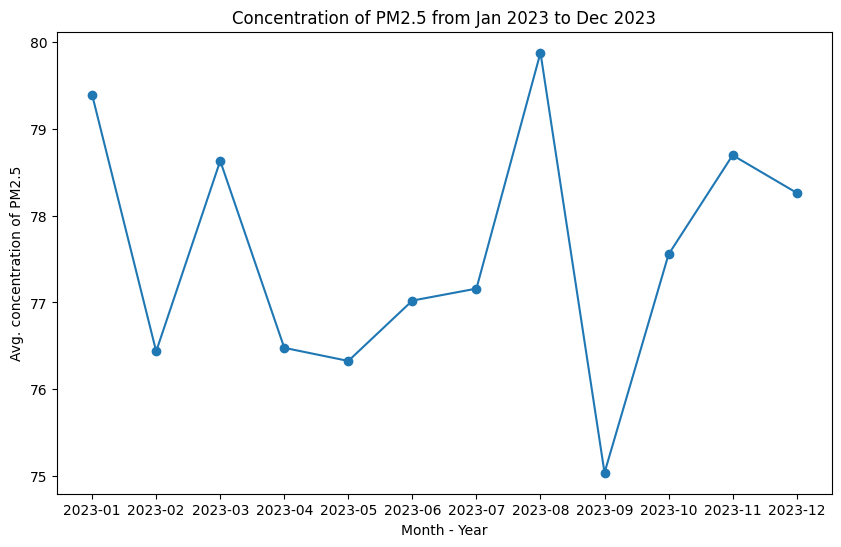

In [ ]:
#Creating the line plot using matplotlib library
plt.figure(figsize=(10, 6))
plt.plot('month_year', 'PM2.5', data=data1, marker='o')
plt.title('Concentration of PM2.5 from Jan 2023 to Dec 2023')
plt.ylabel('Avg. concentration of PM2.5')
plt.xlabel('Month - Year')
plt.show()

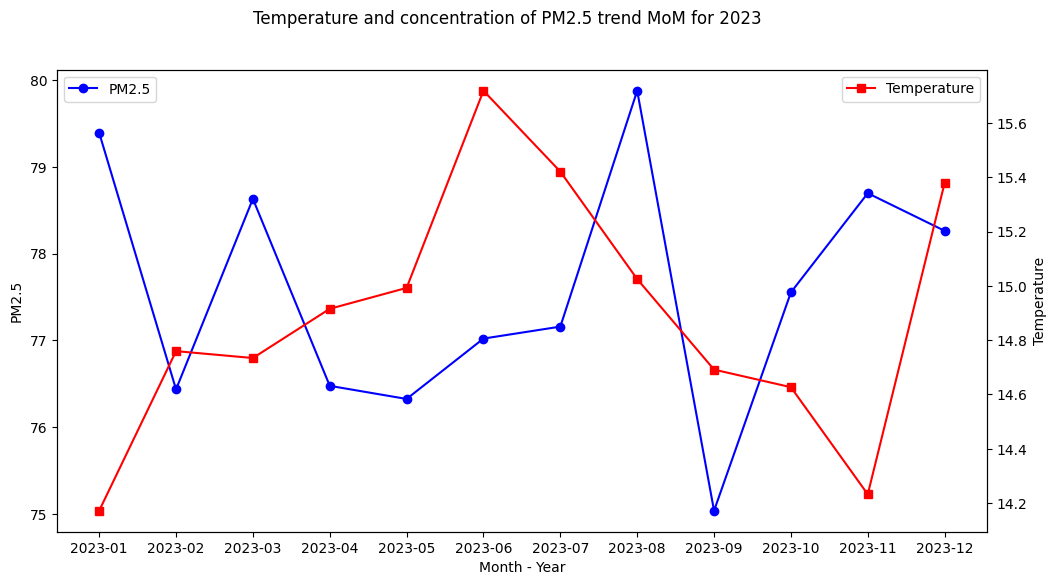

In [ ]:
#Creating the line plot using matplotlib library for comparing the trends of concentrations of PM2.5 and Temperature in 2023
# Plot the first line (y1) on the primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data1.month_year, data1['PM2.5'], color='b', label='PM2.5', marker='o')
ax1.set_xlabel('Month - Year')
ax1.set_ylabel('PM2.5')
ax1.tick_params(axis='y')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second line (y2) on the secondary y-axis
ax2.plot(data1.month_year, data1['Temperature'], color='r', label='Temperature', marker='s')
ax2.set_ylabel('Temperature')
ax2.tick_params(axis='y')

# Add a title and legends
fig.suptitle('Temperature and concentration of PM2.5 trend MoM for 2023')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

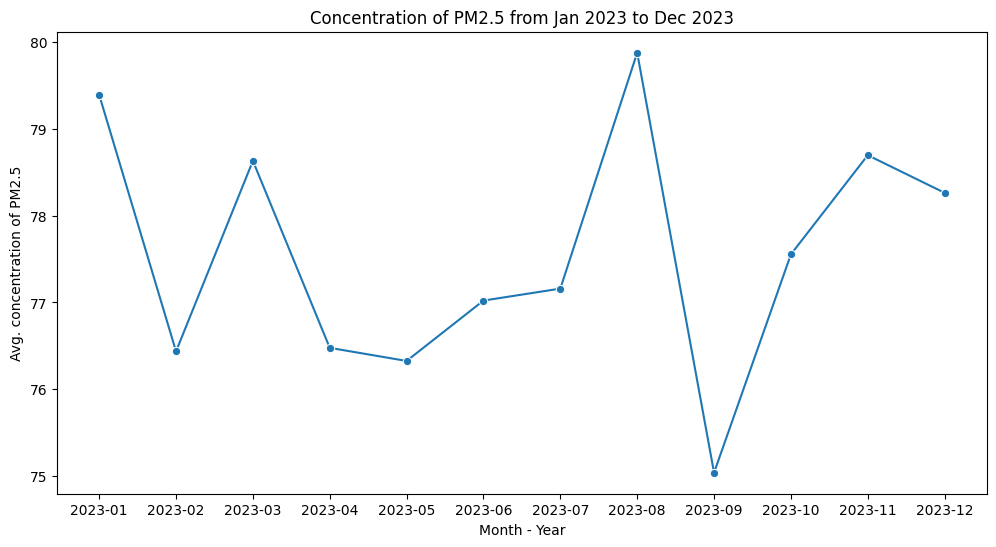

In [ ]:
#Creating the line plot using seaborn library
plt.figure(figsize=(12, 6))
sns.lineplot(data=data1, x='month_year', y='PM2.5', marker='o')
plt.title('Concentration of PM2.5 from Jan 2023 to Dec 2023')
plt.ylabel('Avg. concentration of PM2.5')
plt.xlabel('Month - Year')
plt.show()

In [ ]:
final_data1 = final_data[final_data['Country'].isin(['UAE', 'Mexico', 'Japan'])]

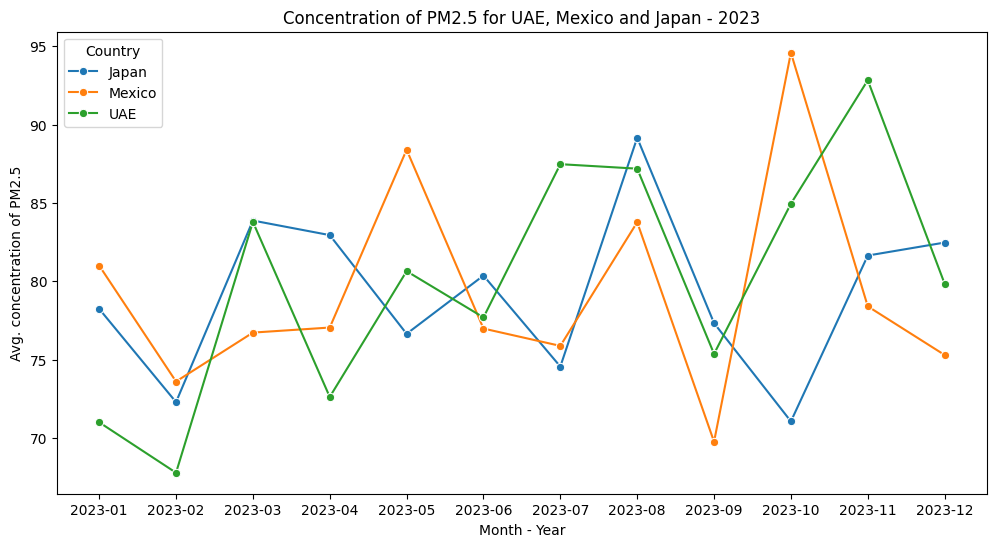

In [ ]:
#Creating the line plot using seaborn library
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_data1, x='month_year', y='PM2.5', hue='Country', marker='o')
plt.title('Concentration of PM2.5 for UAE, Mexico and Japan - 2023')
plt.ylabel('Avg. concentration of PM2.5')
plt.xlabel('Month - Year')
plt.show()

In [ ]:
#Creating line plot using plotly library (PLotly graph object)
fig=go.Figure()
fig.add_trace(go.Scatter(x=data1.month_year, y=data1['PM2.5'], mode='lines+markers', marker=dict(color='green', size=10, symbol='circle')))
## Here we update these values under function attributes such as title,xaxis_title and yaxis_title
fig.update_layout(title='Concentration of PM2.5 from Jan 2023 to Dec 2023', xaxis_title='Month Year', yaxis_title='Avg. concentration of PM2.5')
# Display the figure
fig.show()

In [ ]:
#Using plotly express to create the line chart
fig = px.line(data_frame = data1, x='month_year', y='PM2.5', markers=True, hover_data='PM2.5', title='Avg. concentration of PM2.5 from Jan 2023 to Dec 2023', labels={'month_year':'Month Year','PM2.5':'Avg. concentration of PM2.5'})
fig.show()

In [ ]:
#Creating a data subset data2 to create wordcloud
data2 = final_data.loc[:, ['Country', 'PM2.5']]

In [ ]:
#Grouping data2 by Country to have unique country values for the wordcloud
data2 = data2.groupby('Country').mean()

In [ ]:
#Calculating the mean for the entire dataset
mean_pm = data2['PM2.5'].mean()
mean_pm

77.5728127174097

In [ ]:
#Sorting the dataset values in the ascending order
data2.sort_values(by= 'PM2.5', inplace=True)

In [ ]:
# Define a function for the condition
def classify(row):
    if int(row['PM2.5']) == 80:
        return 7
    if int(row['PM2.5']) == 79:
        return 6
    if int(row['PM2.5']) == 78:
        return 5
    if int(row['PM2.5']) == 77:
        return 4
    if int(row['PM2.5']) == 76:
        return 3
    if int(row['PM2.5']) == 75:
        return 2
    if int(row['PM2.5']) == 74:
        return 1

# Apply the function to each row
data2['rank'] = data2.apply(lambda row: classify(row), axis=1)

In [ ]:
#Displaying all the values of dataset data2
data2

,PM2.5,rank
Country,,
France,74.675959,1
South Korea,74.964804,1
Spain,75.644026,2
Brazil,75.779180,2
Egypt,76.683561,3
USA,77.111224,4
Germany,77.246004,4
Turkey,77.483587,4
UK,77.618729,4


In [ ]:
#Creating wordcloud for all the single word countries by the concentration of PM2.5
word_string = ''
for country in data2.index.values:
     # check if country's name is a single-word name
    if country.count(" ") == 0:
        word_string = word_string + ((country + ' ') * data2.loc[country, 'rank'])

# display the generated text
word_string

'France Spain Spain Brazil Brazil Egypt Egypt Egypt USA USA USA USA Germany Germany Germany Germany Turkey Turkey Turkey Turkey UK UK UK UK Thailand Thailand Thailand Thailand Canada Canada Canada Canada Russia Russia Russia Russia China China China China China Australia Australia Australia Australia Australia India India India India India India Japan Japan Japan Japan Japan Japan Mexico Mexico Mexico Mexico Mexico Mexico UAE UAE UAE UAE UAE UAE UAE '

In [ ]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


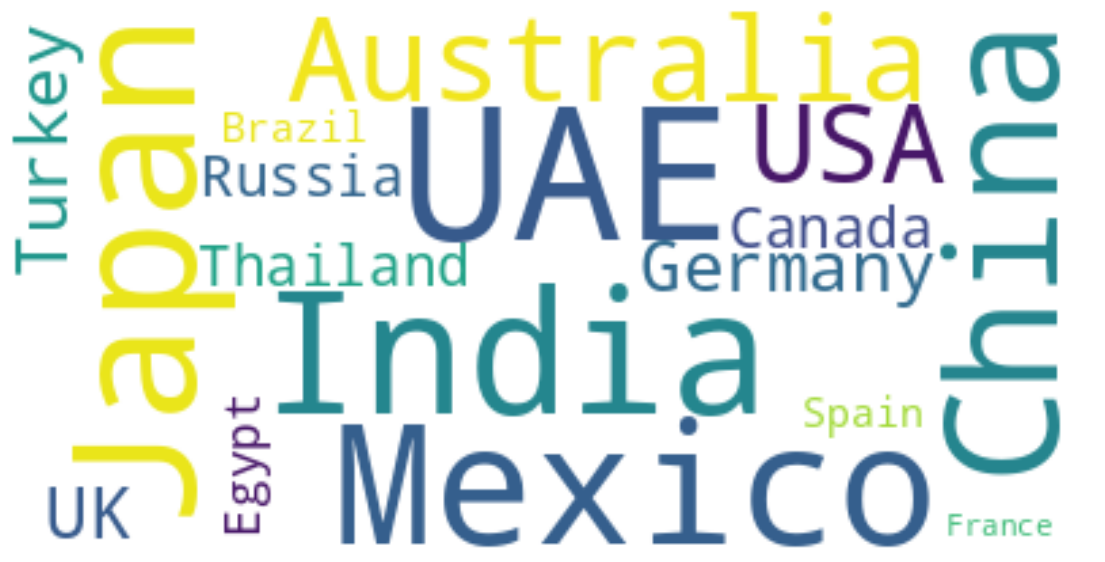

In [ ]:
# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Correlation between Temperature and concentration of PM2.5')

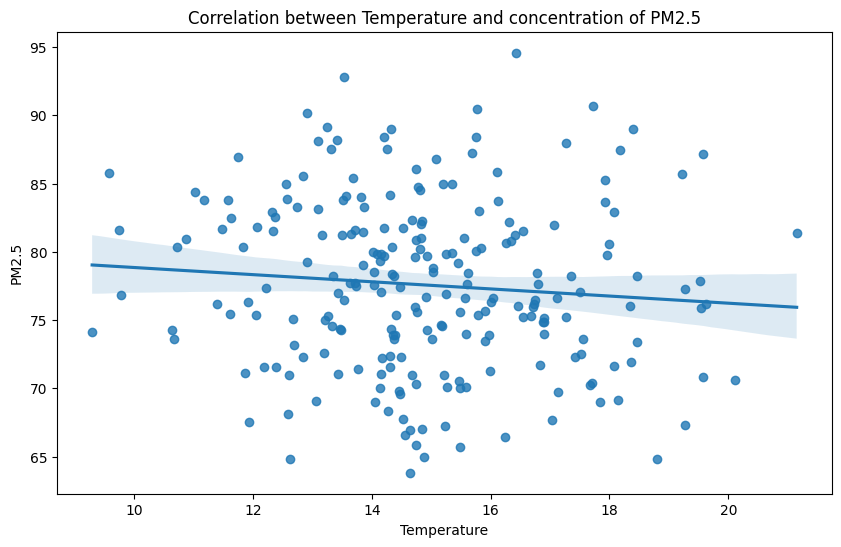

In [ ]:
#Creating a regression plot to check the correlation between temperature and concentration of PM2.5
plt.figure(figsize=(10, 6))
sns.regplot(x='Temperature', y='PM2.5', data=final_data)
plt.title('Correlation between Temperature and concentration of PM2.5')

Text(0.5, 1.0, 'Correlation between Humidity and concentration of PM2.5')

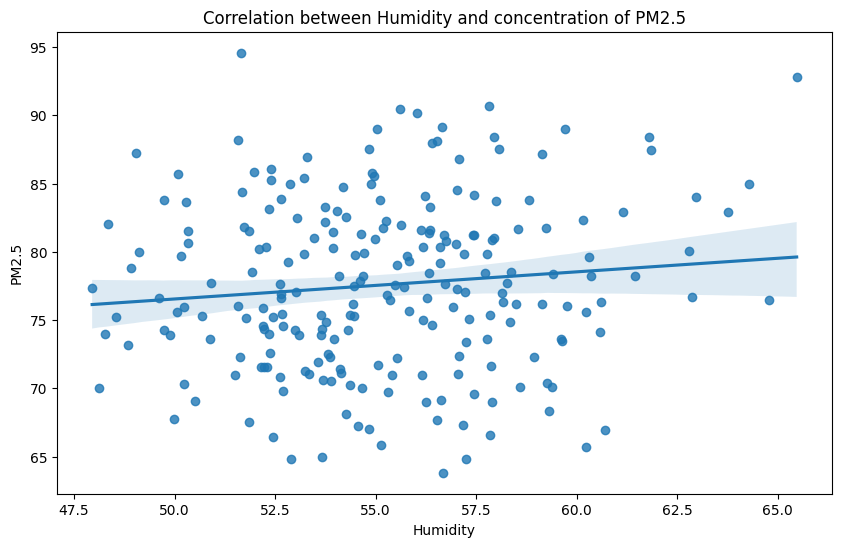

In [ ]:
#Creating a regression plot to check the correlation between humidity and concentration of PM2.5
plt.figure(figsize=(10, 6))
sns.regplot(x='Humidity', y='PM2.5', data=final_data)
plt.title('Correlation between Humidity and concentration of PM2.5')

In [ ]:
# Dictionary to store country names and their ISO-3 codes
country_iso3 = {}

for country in data2.index.values:
    try:
        # Use pycountry to get the ISO-3 code
        country_info = CountryInfo(country)
        country_data = country_info.info()
        country_iso3[country] = country_data['ISO']['alpha3']
    except LookupError:
        # Handle the case where the country name is not found
        print(f"ISO-3 code for {country} not found.")

#Converting the dictionary to a dataframe
country_iso3 = pd.DataFrame(list(country_iso3.items()), columns=['Country', 'ISO3'])
country_iso3

,Country,ISO3
0,France,FRA
1,South Korea,KOR
2,Spain,ESP
3,Brazil,BRA
4,Egypt,EGY
5,USA,USA
6,Germany,DEU
7,Turkey,TUR
8,UK,GBR
9,Thailand,THA


In [ ]:
map_data = data2.reset_index()
map_data = pd.merge(map_data, country_iso3, on='Country')
map_data

,Country,PM2.5,rank,ISO3
0,France,74.675959,1,FRA
1,South Korea,74.964804,1,KOR
2,Spain,75.644026,2,ESP
3,Brazil,75.779180,2,BRA
4,Egypt,76.683561,3,EGY
5,USA,77.111224,4,USA
6,Germany,77.246004,4,DEU
7,Turkey,77.483587,4,TUR
8,UK,77.618729,4,GBR
9,Thailand,77.704265,4,THA


In [ ]:
fig10 = px.choropleth(map_data,  # Input data
                                locations = 'ISO3',
                                color='rank',
                                hover_data=['Country', 'PM2.5'],
                                locationmode='ISO-3',
                                color_continuous_scale='GnBu',
                                range_color=[0, map_data['rank'].max()])
fig10.update_layout(title_text='Concentration of PM2.5 in countries', geo_scope='world')
fig10.show()

In [ ]:
# Import required libraries
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import plotly.express as px

available_country = final_data['Country'].unique()

# Create a dash application
app = dash.Dash(__name__)

# Build dash app layout
app.layout = html.Div(children=[
    html.H1('Global Air Quality Data',
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': 30}),
    html.Br(),
    html.Label("Select Country:"),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in available_country],
        value='USA',  # Default value
        style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}),
    html.Br(),
    # Segment 1
    html.Div([
        html.Div(html.Img(id='line1-plot')),
        html.Div(html.Img(id='line2-plot'))
             ], style={'display': 'flex'}),
    # Segment 2
    html.Div([
        html.Div(html.Img(id='line3-plot')),
        html.Div(html.Img(id='line4-plot'))
             ], style={'display': 'flex'}),
    # Segment 3
    html.Div([
        html.Div(dcc.Graph(id='line5-plot')),
        html.Div(dcc.Graph(id='line6-plot'))
             ], style={'display': 'flex'}),
    # Segment 4
    html.Div([
        html.Div(html.Img(id='reg1-plot')),
        html.Div(html.Img(id='reg2-plot'))
             ], style={'display': 'flex'}),
    # Segment 5
    html.Div([
        html.Div(html.Img(id='wordcloud-plot')),
        html.Div(dcc.Graph(id='map-plot'))
             ], style={'display': 'flex'})
])

@app.callback(
    Output('line1-plot', 'src'),
    Output('line2-plot', 'src'),
    Output('line3-plot', 'src'),
    Output('line4-plot', 'src'),
    Output('line5-plot', 'figure'),
    Output('line6-plot', 'figure'),
    Output('reg1-plot', 'src'),
    Output('reg2-plot', 'src'),
    Output('wordcloud-plot', 'src'),
    Output('map-plot', 'figure'),
    dash.dependencies.Input('country-dropdown', 'value')
    )
def get_graph(country_name):
    # Generate HTML table
      global final_data, final_data1, wordcloud, map_data
      final = final_data[final_data['Country'] == country_name]

    #Build the matplotlib figures
      fig1 = plt.figure(figsize=(10, 6))
      plt.plot('month_year', 'PM2.5', data=final, marker='o')
      plt.title('Concentration of PM2.5 from Jan 2023 to Dec 2023')
      plt.ylabel('Avg. concentration of PM2.5')
      plt.xlabel('Month - Year')

      fig2, ax1 = plt.subplots(figsize=(10, 6))

      ax1.plot(final.month_year, final['PM2.5'], color='b', label='PM2.5', marker='o')
      ax1.set_xlabel('Month - Year')
      ax1.set_ylabel('PM2.5')
      ax1.tick_params(axis='y')

      # Create a second y-axis that shares the same x-axis
      ax2 = ax1.twinx()

      # Plot the second line (y2) on the secondary y-axis
      ax2.plot(final.month_year, final['Temperature'], color='r', label='Temperature', marker='s')
      ax2.set_ylabel('Temperature')
      ax2.tick_params(axis='y')

      # Add a title and legends
      fig2.suptitle('Temperature and concentration of PM2.5 trend MoM for 2023')
      ax1.legend(loc='upper left')
      ax2.legend(loc='upper right')

    # Build the seaborn figures
      fig3 = plt.figure(figsize=(10, 6))
      sns.lineplot(data=final, x='month_year', y='PM2.5', marker='o')
      plt.title('Concentration of PM2.5 from Jan 2023 to Dec 2023')
      plt.ylabel('Avg. concentration of PM2.5')
      plt.xlabel('Month - Year')

      fig4 = plt.figure(figsize=(10, 6))
      sns.lineplot(data=final_data1, x='month_year', y='PM2.5', hue='Country', marker='o')
      plt.title('Concentration of PM2.5 for UAE, Mexico and Japan - 2023')
      plt.ylabel('Avg. concentration of PM2.5')
      plt.xlabel('Month - Year')

    # Build the Plotly figures
      fig5=go.Figure()
      fig5.add_trace(go.Scatter(x=final.month_year, y=final['PM2.5'], mode='lines+markers', marker=dict(color='green', size=10, symbol='circle')))
      fig5.update_layout(title='Concentration of PM2.5 from Jan 2023 to Dec 2023', xaxis_title='Month Year', yaxis_title='Avg. concentration of PM2.5', width=950, height=700,
                         plot_bgcolor='white',
                         xaxis=dict(
                         showgrid=False,
                         mirror=True,
                         linecolor='black',
                         linewidth=2
                                   ),
                         yaxis=dict(
                         showgrid=False,
                         mirror=True,
                         linecolor='black',
                         linewidth=2
                        ))

      fig6 = px.line(data_frame=final, x='month_year', y='PM2.5', markers=True, title='Avg. concentration of PM2.5 from Jan 2023 to Dec 2023', labels={'month_year':'Month Year','PM2.5':'Avg. concentration of PM2.5'})
      fig6.update_layout(width=950, height=700,
                         plot_bgcolor='white',
                         xaxis=dict(
                         showgrid=False,
                         mirror=True,
                         linecolor='black',
                         linewidth=2
                                   ),
                         yaxis=dict(
                         showgrid=False,
                         mirror=True,
                         linecolor='black',
                         linewidth=2
                        ))

    # Build the regression figures
      fig7 = plt.figure(figsize=(10, 6))
      sns.regplot(x='Temperature', y='PM2.5', data=final)
      plt.title('Correlation between Temperature and concentration of PM2.5')

      fig8 = plt.figure(figsize=(10, 6))
      sns.regplot(x='Humidity', y='PM2.5', data=final)
      plt.title('Correlation between Humidity and concentration of PM2.5')

    # Build the wordcloud figure
      fig9 = plt.figure(figsize=(10, 6))
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.title('Wordcloud showing the concentration of PM2.5 by Country')
      plt.axis('off')

    # Build the choropleth map figure
      fig10 = px.choropleth(map_data,  # Input data
                                locations = 'ISO3',
                                color='rank',
                                hover_data=['Country', 'PM2.5'],
                                locationmode='ISO-3',
                                color_continuous_scale='GnBu',
                                range_color=[0, map_data['rank'].max()])
      fig10.update_layout(title_text='Concentration of PM2.5 in countries', geo_scope='world', width=1000, height=600)



    # Save it to a temporary buffer.
      buf1 = BytesIO()
      fig1.savefig(buf1, format="png")
      buf2 = BytesIO()
      fig2.savefig(buf2, format="png")
      buf3 = BytesIO()
      fig3.savefig(buf3, format="png")
      buf4 = BytesIO()
      fig4.savefig(buf4, format="png")
      buf7 = BytesIO()
      fig7.savefig(buf7, format="png")
      buf8 = BytesIO()
      fig8.savefig(buf8, format="png")
      buf9 = BytesIO()
      fig9.savefig(buf9, format="png")
    # Embed the result in the html output.
      fig1_data = base64.b64encode(buf1.getbuffer()).decode("ascii")
      fig1_line_mpl = f'data:image/png;base64,{fig1_data}'
      fig2_data = base64.b64encode(buf2.getbuffer()).decode("ascii")
      fig2_line_mpl = f'data:image/png;base64,{fig2_data}'
      fig3_data = base64.b64encode(buf3.getbuffer()).decode("ascii")
      fig3_line_sns = f'data:image/png;base64,{fig3_data}'
      fig4_data = base64.b64encode(buf4.getbuffer()).decode("ascii")
      fig4_line_sns = f'data:image/png;base64,{fig4_data}'
      fig7_data = base64.b64encode(buf7.getbuffer()).decode("ascii")
      fig7_line_reg = f'data:image/png;base64,{fig7_data}'
      fig8_data = base64.b64encode(buf8.getbuffer()).decode("ascii")
      fig8_line_reg = f'data:image/png;base64,{fig8_data}'
      fig9_data = base64.b64encode(buf9.getbuffer()).decode("ascii")
      fig9_wordcloud = f'data:image/png;base64,{fig9_data}'

      return [fig1_line_mpl, fig2_line_mpl, fig3_line_sns, fig4_line_sns, fig5, fig6, fig7_line_reg, fig8_line_reg, fig9_wordcloud, fig10]

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
!pip install pyngrok==3.2.0

ERROR: Could not find a version that satisfies the requirement pyngrok==3.2.0 (from versions: 0.1.2, 0.2.0, 0.2.1, 0.2.2, 0.3.0, 0.3.1, 0.3.2, 1.0.0, 1.1.1, 1.1.2, 1.2.0, 1.2.2, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5, 1.3.6, 1.3.7, 1.3.8, 1.4.0, 1.4.2, 1.4.3, 1.4.4, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.1.7, 3.0.0, 3.1.0, 3.1.1, 4.0.0, 4.0.1, 4.0.2, 4.0.3, 4.1.0, 4.1.1, 4.1.2, 4.1.3, 4.1.4, 4.1.5, 4.1.6, 4.1.7, 4.1.8, 4.1.9, 4.1.10, 4.1.11, 4.1.12, 4.1.13, 4.1.15, 4.1.16, 4.2.1, 4.2.2, 5.0.0, 5.0.1, 5.0.2, 5.0.3, 5.0.4, 5.0.5, 5.0.6, 5.1.0, 5.2.0, 5.2.1, 5.2.2, 5.2.3, 6.0.0, 6.1.0, 6.1.1, 6.1.2, 7.0.0, 7.0.1, 7.0.2, 7.0.3, 7.0.4, 7.0.5, 7.1.0, 7.1.1, 7.1.2, 7.1.3, 7.1.4, 7.1.5, 7.1.6, 7.2.0)
ERROR: No matching distribution found for pyngrok==3.2.0


In [ ]:
from pyngrok import ngrok
ngrok.kill()
NGROK_AUTH_TOKEN = "2kHtF7UY5U7W3HAGO8Wc1zy4QLa_2Ag3xBQUuxtgxb3nC1Qmd"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
ngrok.connect(8080)

ERROR:pyngrok.process:t=2024-08-06T13:55:11+0000 lvl=eror msg="failed to auth" obj=tunnels.session err="Your ngrok-agent version \"2.3.41\" is too old. The minimum supported agent version for your account is \"3.2.0\". Please update to a newer version with `ngrok update`, by downloading from https://ngrok.com/download, or by updating your SDK version. Paid accounts are currently excluded from minimum agent version requirements. To begin handling traffic immediately without updating your agent, upgrade to a paid plan: https://dashboard.ngrok.com/billing/subscription.\r\n\r\nERR_NGROK_121\r\n"



PyngrokNgrokError: The ngrok process errored on start: Your ngrok-agent version "2.3.41" is too old. The minimum supported agent version for your account is "3.2.0". Please update to a newer version with `ngrok update`, by downloading from https://ngrok.com/download, or by updating your SDK version. Paid accounts are currently excluded from minimum agent version requirements. To begin handling traffic immediately without updating your agent, upgrade to a paid plan: https://dashboard.ngrok.com/billing/subscription.\r\n\r\nERR_NGROK_121\r\n.